In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
data = pd.read_excel(Path("..", "01_fit_natural_biotite", "Metapelite-Database_Bt_CLEAN_2024-02-03.xlsx"))
data.keys()

Index(['Reference', 'Sequence locality', 'Bt-Si', 'Bt-Ti', 'Bt-Al', 'Bt-FeTot',
       'Bt-Mn', 'Bt-Mg', 'Bt-K', 'Bt-XMg_FeTot', 'Bt-XMg', 'Bt-XFe3+', 'MAS',
       'MAS #', 'Zone', 'Zone #', 'Qz', 'Pl', 'Ms', 'Pg', 'Mrg', 'Prl', 'Chl',
       'Cld', 'Bt', 'Grt', 'Crd', 'St', 'And', 'Ky', 'Sil', 'Kfs', 'Opx',
       'Crn', 'Spl', 'Gr', 'Ttn', 'Rt', 'Ilm', 'Mag', 'Hem', 'Sul', 'Po', 'Py',
       'Dol', 'Cal', 'Ep', 'Czo', 'Pressure estimate center',
       'Pressure estimate range', 'Pressure estimate random uniform',
       'Temperature estimate center', 'Temperature estimate range',
       'Temperature estimate random uniform', 'Temperature Ti-in-Bt',
       'Temperature random ordered after Ti-in-Bt', 'Sorting indices'],
      dtype='object')

# Set-up a *P*-*T* grid

Rasterize *P*-*T* space and calculate the mean composition of each cell.

In [3]:
T_grid = np.linspace(400, 900, 20)
P_grid = np.linspace(0.15, 1.0, 20)

TT_grid, PP_grid = np.meshgrid(T_grid, P_grid)

i_grid_cells = np.searchsorted(P_grid, data["Pressure estimate random uniform"] * 0.1)
j_grid_cells = np.searchsorted(T_grid, data["Temperature random ordered after Ti-in-Bt"])

save bioite composition (Mn, Fe, Mg, Al, Si, Ti) [apfu] as array

In [4]:
bt_comp_arr = data[["Bt-Mn", "Bt-FeTot", "Bt-Mg", "Bt-Al", "Bt-Si", "Bt-Ti"]].values

Calculate the mean composition and std deviation of each cell in the *P*-*T* grid.\
Only cells with more than 2 data points are considered.

In [5]:
grid_no_samples = np.zeros((len(P_grid), len(T_grid)))
grid_mean_comp = np.zeros((len(P_grid), len(T_grid), 6))
grid_sd_comp = np.zeros((len(P_grid), len(T_grid), 6))


for i in range(len(P_grid)):
    for j in range(len(T_grid)):
        idx_grid_cell = np.where(np.logical_and(i_grid_cells == i, j_grid_cells == j))[0]
        no_samples_per_cell = len(idx_grid_cell)

        if no_samples_per_cell > 2:
            mean_c = np.mean(bt_comp_arr[idx_grid_cell], axis=0)
            sd_c = np.std(bt_comp_arr[idx_grid_cell], axis=0)
        else:
            mean_c = np.nan
            sd_c = np.nan

        grid_no_samples[i, j] = no_samples_per_cell

        grid_mean_comp[i, j] = mean_c
        grid_sd_comp[i, j] = sd_c


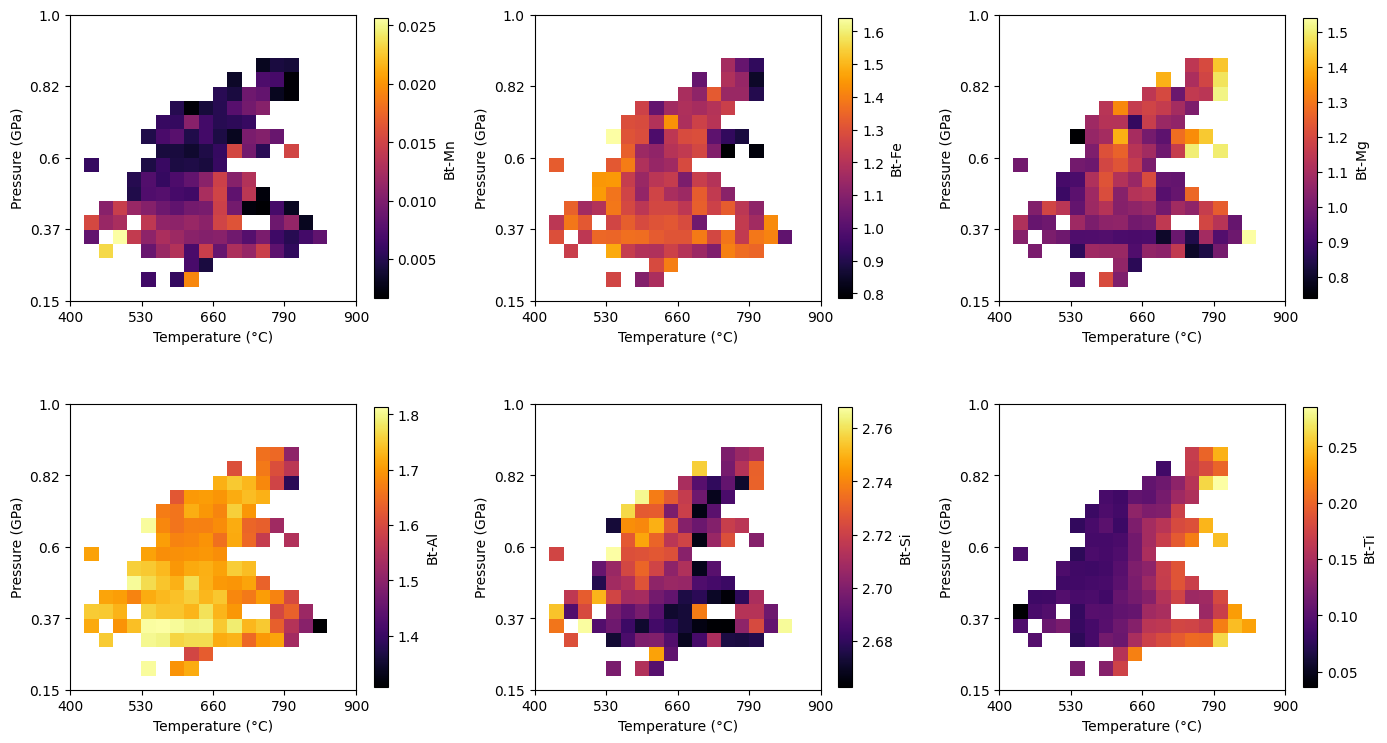

In [6]:
cmap_magma = plt.get_cmap("inferno")
cmap_magma.set_bad("white")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_mean_comp[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "BtComp_PT.pdf"), dpi=600)

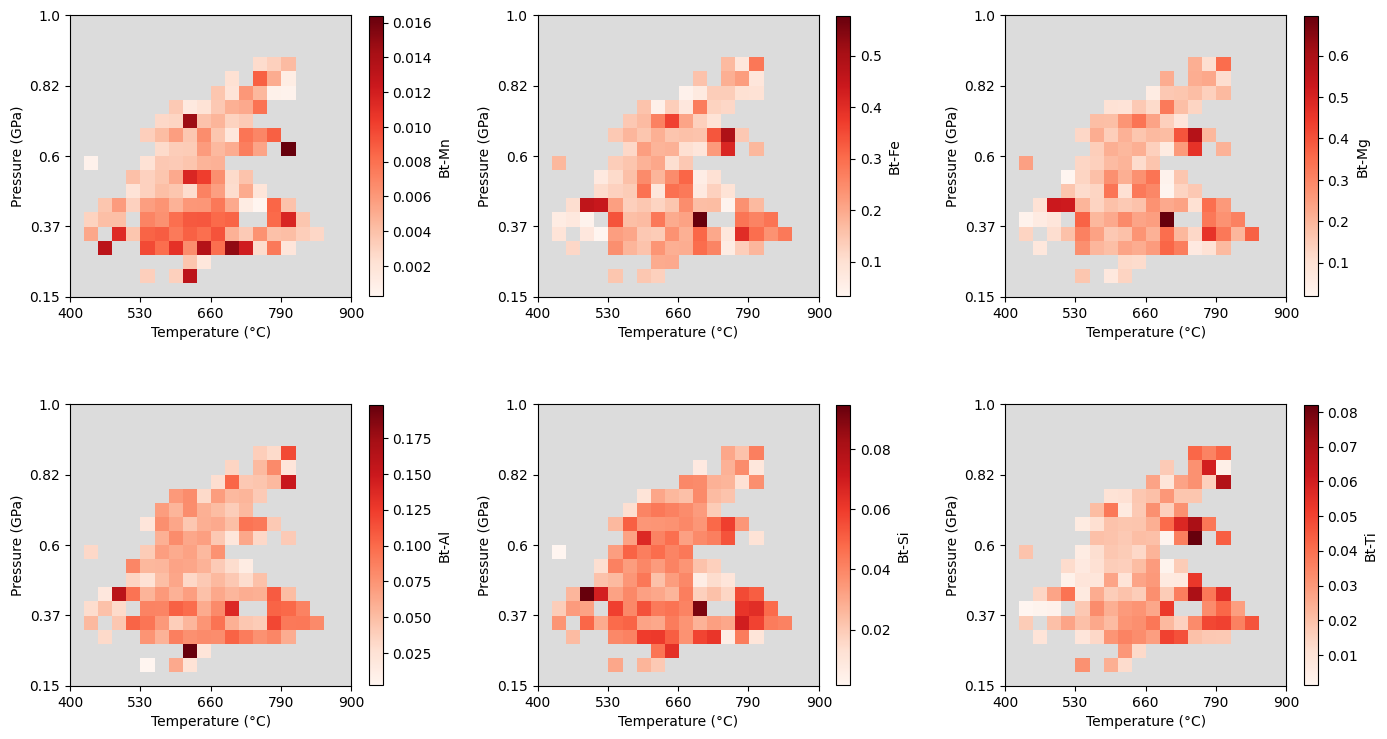

In [7]:
cmap_magma = plt.get_cmap("Reds")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_sd_comp[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "BtComp_PT_SD.pdf"), dpi=600)

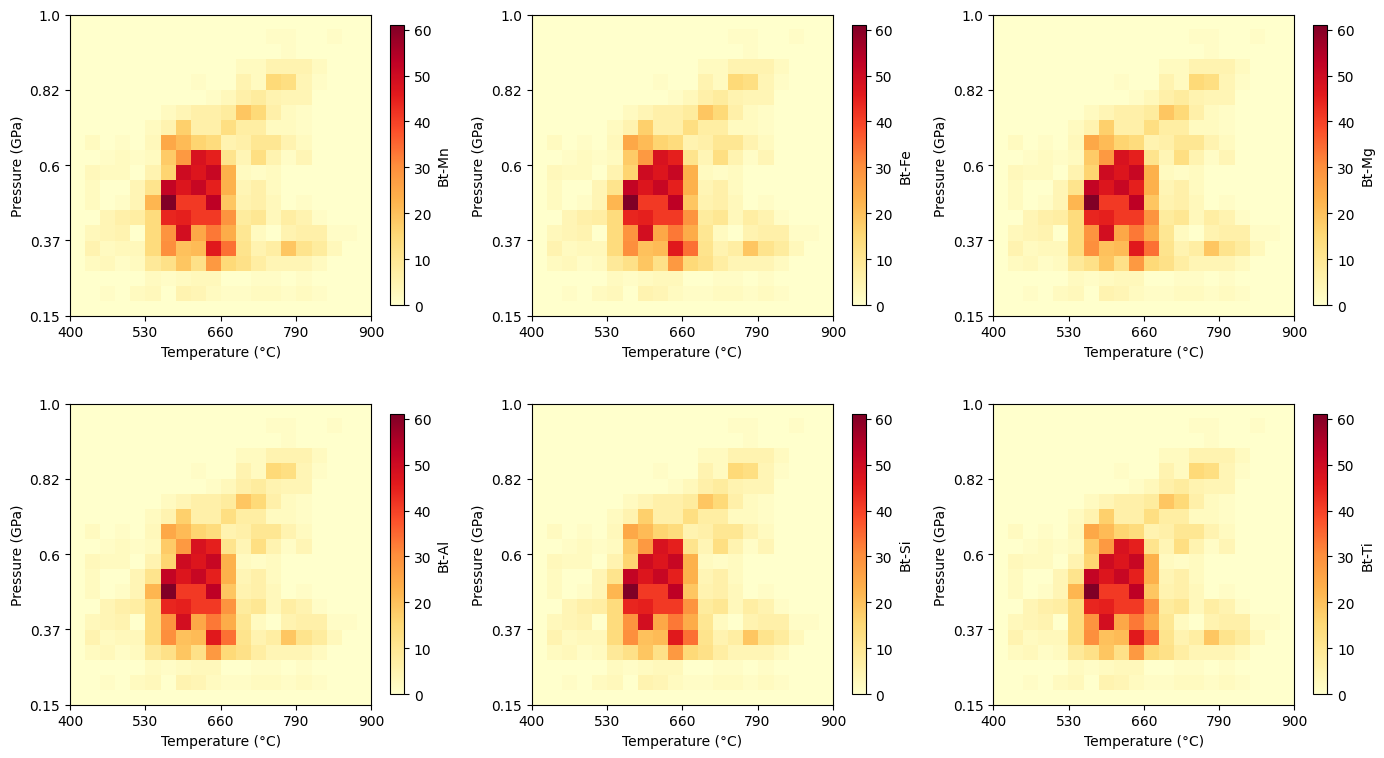

In [8]:
cmap_magma = plt.get_cmap("YlOrRd")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_no_samples, origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "BtComp_PT_noSamples.pdf"), dpi=600)